<a href="https://colab.research.google.com/github/Eduardo-Mati/Projetos-integrador---Desafio-unifacisa---Modelos-de-Machine-Learning/blob/main/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Import das bibliotecas de ciência de dados
# ==============================================
# 1. Manipulação e análise de dados
# ==============================================
import pandas as pd
import numpy as np

# ==============================================
# 2. Visualização
# ==============================================
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 3. Pré-processamento e divisão de dados
# ==============================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# ==============================================
# 4. Modelos de classificação
# ==============================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ==============================================
# 5. Métricas de avaliação
# ==============================================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

# ==============================================
# 6. Explicabilidade (opcional, mas recomendado)
# ==============================================
import shap
import eli5

# ==============================================
# 7. Configurações adicionais
# ==============================================
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")



In [ ]:
# fazendo o dataset do arquivo heart_desease_data.csv
df = pd.read_csv('heart_desease_data.csv')

In [ ]:
# Listando as tabelas presentes no arquivo
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


📊 Tradução das variáveis

age → Idade do paciente (anos)

sex → Sexo (1 = masculino, 0 = feminino)

cp → Tipo de dor no peito (chest pain type):

0 = Angina típica

1 = Angina atípica

2 = Dor não anginosa

3 = Assintomático

trestbps → Pressão arterial em repouso (resting blood pressure, em mm Hg)

chol → Colesterol sérico (mg/dl)

fbs → Glicemia de jejum (fasting blood sugar): 1 se > 120 mg/dl, 0 se ≤ 120 mg/dl

restecg → Resultado do eletrocardiograma em repouso (resting ECG):

0 = Normal

1 = Anormalidade ST-T (inversão da onda T, elevação/abaixamento do ST > 0.05 mV)

2 = Hipertrofia ventricular esquerda provável/definida

thalach → Frequência cardíaca máxima alcançada

exang → Angina induzida por exercício (1 = sim, 0 = não)

oldpeak → Depressão do segmento ST induzida por exercício em relação ao repouso

slope → Inclinação do segmento ST no pico do exercício:

0 = ascendente

1 = plano

2 = descendente

ca → Número de vasos principais coloridos pela fluoroscopia (0–3)

thal → Resultados do exame de tálio (thalassemia test):

1 = Normal

2 = Defeito fixo

3 = Defeito reversível

target → Diagnóstico de doença cardíaca (variável alvo):

0 = Não tem doença cardíaca

1 = Tem doença cardíaca

In [ ]:
# normalizando variaveis

scaler = StandardScaler()

# Separate features and target before scaling
features = df.drop('target', axis=1)
target = df['target']

df_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(df_scaled, columns=features.columns)

In [ ]:
df_scaled.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873,0.914529
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922,0.914529
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029,0.914529
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029,0.914529
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922,0.914529


In [45]:
# Observando as correlações de variáveis
def plot_corr(df_scaled, size=35):
    corr = df_scaled.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

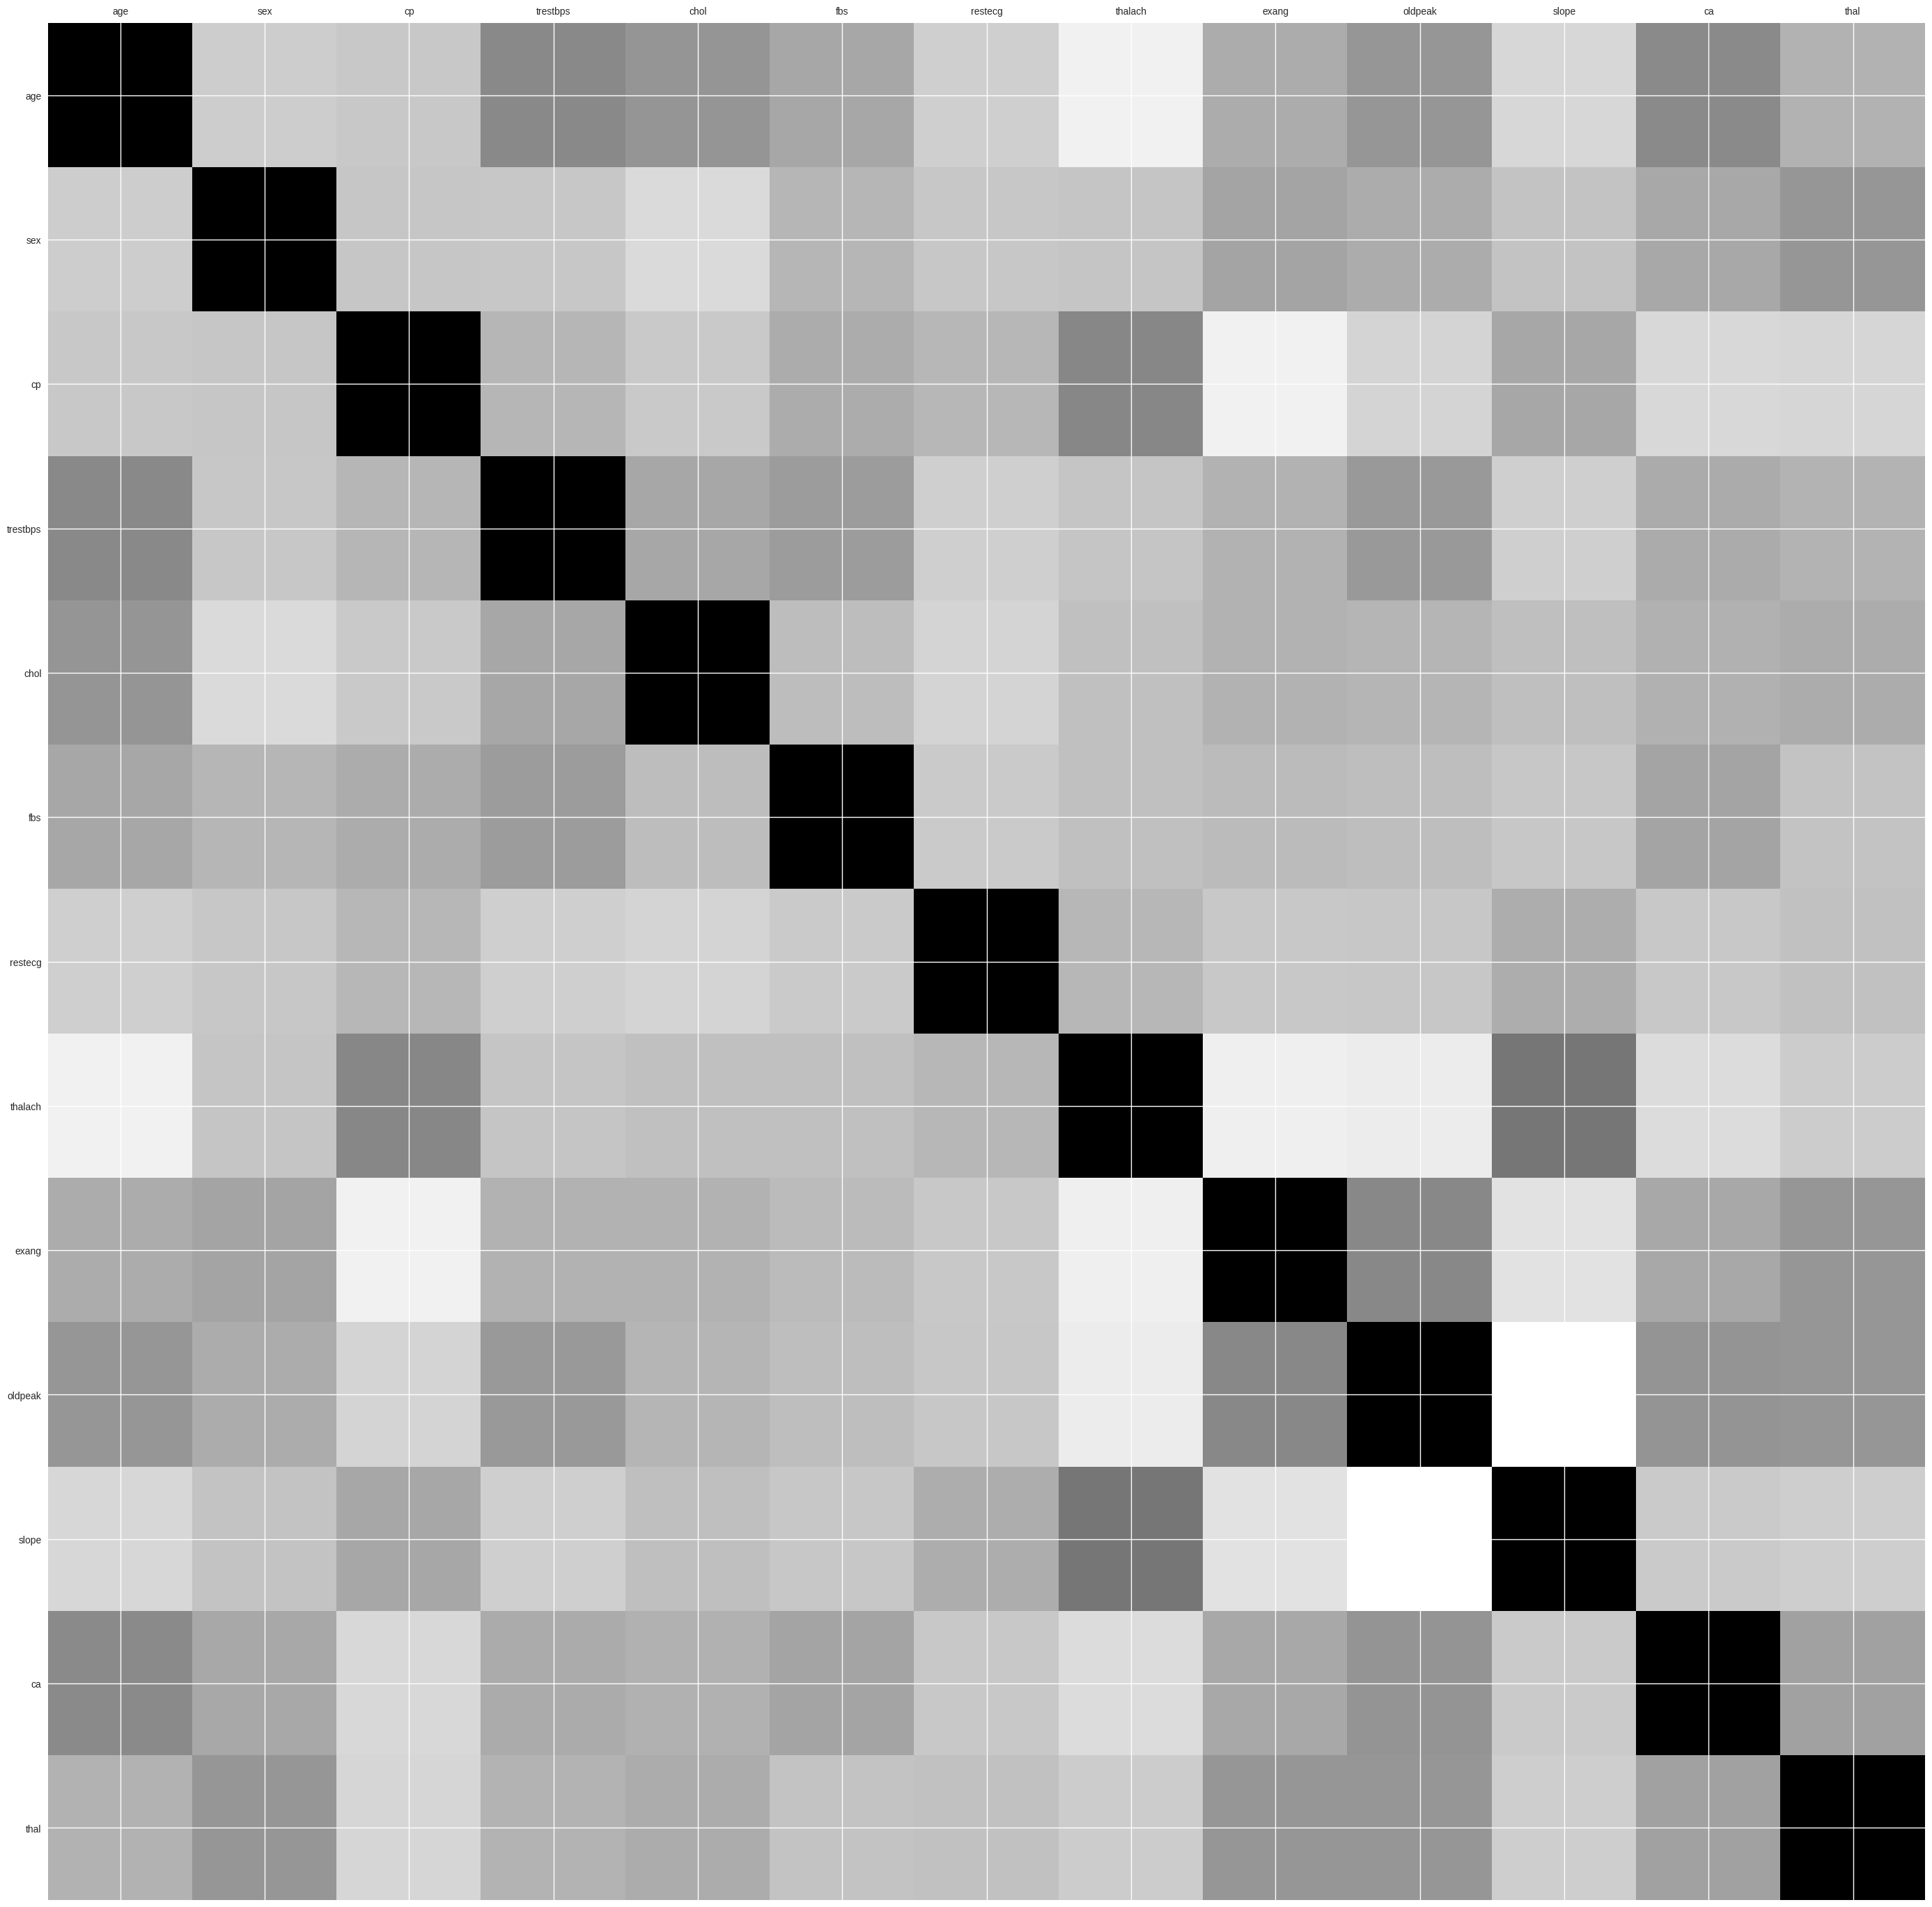

In [46]:
plot_corr(df_scaled)

In [ ]:
# Verificação de dados nulos
df_scaled.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df_scaled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16,0.000000
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00,-1.093459
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01,-1.093459
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01,0.914529
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00,0.914529
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00,0.914529


In [ ]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_scaled)

#Definição do atributo de classificacao
data_classif = np.array(target)

In [ ]:
# Definição de base de treino e base de teste
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [ ]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[-0.37126932  0.68100522  1.00257707 ...  0.97635214 -0.71442887
  -0.51292188]
 [-0.15069166 -1.46841752 -0.93851463 ...  0.97635214 -0.71442887
  -0.51292188]
 [-0.26098049  0.68100522  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [-0.92271345  0.68100522  1.00257707 ... -0.64911323 -0.71442887
  -0.51292188]
 [-2.7976235   0.68100522  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 [ 0.06988599 -1.46841752 -0.93851463 ... -0.64911323 -0.71442887
  -0.51292188]]
Conjunto de Validacao
[[-1.25357993  0.68100522  1.00257707 ...  0.97635214  0.26508221
  -0.51292188]
 [ 0.84190778 -1.46841752 -0.93851463 ... -0.64911323  2.22410436
  -0.51292188]
 [-1.47415758  0.68100522  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 0.29046364 -1.46841752 -0.93851463 ...  0.97635214 -0.71442887
  -0.51292188]
 [-1.69473524 -1.46841752  1.00257707 ...  0.97635214 -0.71442887
  -0.51292188]
 [-1.1432911   0.68100522  0

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df.index)) * 100))

69.97% nos dados de treino
30.03% nos dados de teste


In [ ]:
# Usando o modelo de classificação Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_treino, y_treino)

RandomForestClassifier(random_state=42)

In [ ]:
#Predição e acurácia para o conjunto de treinamento RF
print("Predicao para o conjunto de treinamento")
y_pred_treino = rf.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
1.0
Na Base de Treinamento


In [ ]:
# Criando uma Confusion Matrix RF
print("Confusion Matrix")

from sklearn.metrics import confusion_matrix, classification_report
y_pred_val = rf.predict(x_val)
print("{0}".format(confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[51  5]
 [ 7 28]]

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.91      0.89        56
           0       0.85      0.80      0.82        35

    accuracy                           0.87        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91



A precisão do modelo do RANDOM FOREST foi de 87%, o que é um resultado muito bom

In [ ]:
# Aplicando o modelo de classificação SVM
svm = SVC(random_state=42)
svm.fit(x_treino, y_treino)


SVC(random_state=42)

In [ ]:
#Predição e acurácia para o conjunto de treinamento SVM
print("Predicao para o conjunto de treinamento")
y_pred_treino = svm.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.9339622641509434


In [ ]:
# Criando uma Confusion Matrix SVM
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix")
y_pred_val = svm.predict(x_val)
print("{0}".format(confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[50  6]
 [ 8 27]]

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.89      0.88        56
           0       0.82      0.77      0.79        35

    accuracy                           0.85        91
   macro avg       0.84      0.83      0.84        91
weighted avg       0.85      0.85      0.85        91



A precisão do modelo do SVM foi de 85%, o que é um resultado muito bom também

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Verificndo a feature inportance do modelo de Random forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
print(indices)
print(importances)

[ 2  7  9 11  0  8  4  3 12 10  1  6  5]
[0.08954376 0.03383502 0.13439837 0.06991653 0.07875971 0.00991142
 0.03317814 0.11473633 0.08752268 0.11370781 0.05234292 0.11243198
 0.06971534]


In [ ]:
df_scaled.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922


In [ ]:
# Verificando a feature importance do SVM


In [ ]:

import eli5
from eli5.sklearn import PermutationImportance

feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']


perm = PermutationImportance(svm, random_state=42).fit(x_val, y_val)


eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0725 ± 0.0357,ca
0.0374 ± 0.0383,thal
0.0352 ± 0.0256,cp
0.0330 ± 0.0197,sex
0.0198 ± 0.0215,thalach
0.0132 ± 0.0323,exang
0.0088 ± 0.0256,oldpeak
0.0088 ± 0.0164,age
0.0066 ± 0.0108,chol
0.0022 ± 0.0323,trestbps



O que a saída do ELI5 mostra é o impacto de cada característica no desempenho do modelo quando seus valores são embaralhados aleatoriamente. Uma característica com uma pontuação de importância baixa (próxima de zero ou até negativa) significa que embaralhar seus valores teve pouco ou nenhum efeito (ou até mesmo um efeito ligeiramente positivo, o que pode acontecer com este método) na acurácia do modelo no conjunto de dados de validação. Isso sugere que o modelo não depende muito daquela característica específica para fazer suas previsões neste conjunto de dados e com esta configuração de SVM.


--------------------------------------------------------------------------

Pergunta: Qual modelo apresentou melhor desempenho? Quais variáveis mais impactaram na previsão?

O modelo que apresentou melhor desempenho foi o Random Forest com 87%